<a href="https://colab.research.google.com/github/timetoshine17/Beginner-for-Python/blob/main/SN/speech_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

In [2]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr # 초 단위로 정의된 신호의 시간
  theta = t * 2*np.pi * freq + phase #시간에 따라 변화하는 각도 값 배
  s = amp * np.sin(theta) #사인값 생성
  return s, t, theta

phasor_sine 함수 : 지정된 진폭(amp), 샘플링 레이트(sr), 지속 시간(dur), 주파수(freq), 위상(phase)를 기반으로 사인파를 생성하는 함수

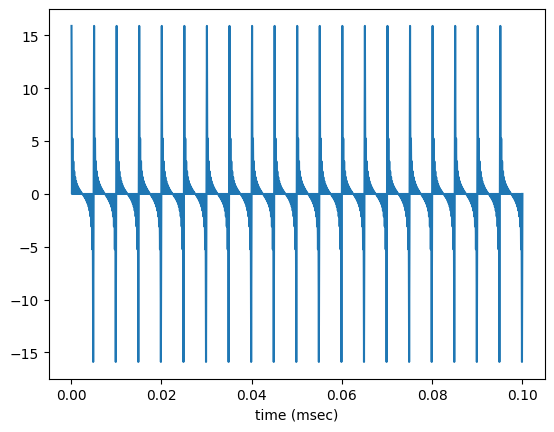

In [5]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 200
Fend = int(sr/2)

phase = 0

s_all = 0
for freq in range(F0, Fend+1, F0):
  s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]);
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

나이퀴스트 주파수 = 샘플링 레이트의 절반으로, 디지털 신호에서 표현 가능한 최대 주파수
주파수 F를 라디안 값으로 표현한

In [7]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [8]:
s = s_all

In [9]:
from scipy.signal import lfilter

RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)


글로탈 공진기의 중심 주파수와 대역폭을 설정
공진 필터 계수를 계산 (resonance 함수).
필터를 적용하여 신호를 변형
결과를 오디오로 재생

In [10]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

In [12]:
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')
ipd.Audio(s[7000:12000], rate=sr)


import scipy
M = int(sr/1000+4) # Number of LPC coefficnets
a = librosa.lpc(s[7000:12000], order=M)

LPC 필터의 주파수 응답을 시각화

(0.0, 5000.0)

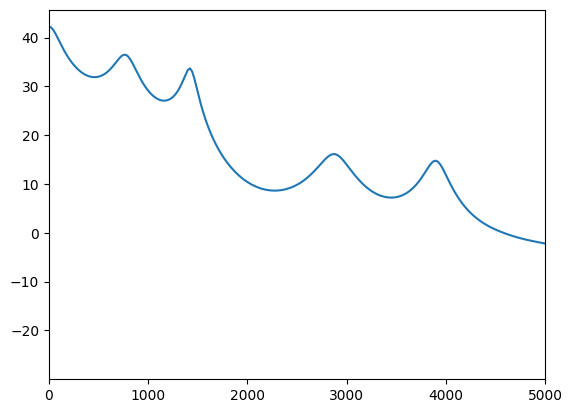

In [13]:
w, h = scipy.signal.freqz(1, a)
plt.plot (w*sr/(2*np.pi), 20*np.log10(np.abs(h)))
plt.xlim((0,5000))

In [15]:
BWcutoff = 2000; #대역폭의 임계값 설
F = np.sort(np.angle(np.roots(a)))
order = np.argsort(np.angle(np.roots(a)))
F = F*sr/(2*np.pi);

BW = -2*np.log(abs(np.roots(a)))*sr/(2*np.pi);
BW = BW[order];

idx = [i for i in range(F.shape[0]) if (F[i] > 0) & (BW[i] < BWcutoff) ]

print(F[idx]) #조건에 맞는 주파수 산출
print(BW[idx]) #조건에 맞는 대역폭 산출


[  775.3244  1426.5485  2878.915   3902.955   4639.4     5171.142
  7398.1133  7781.442   8587.276   9275.192  10262.792 ]
[ 222.68924  126.34945  315.5302   219.47711 1085.3368   542.42126
  209.44786  304.80313 1367.3931   175.70686  839.6638 ]
